In [34]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib as mpl
import pandas as pd
%matplotlib inline
import networkx as nx
import random
from statistics import mean, median
from collections import Counter

In [2]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [3]:
# Create class of graphs, make these two the methods

In [108]:
# degree distribution
def deg_dist(G):
    p_k = Counter([G.degree(i) for i in G.nodes])
    for n in p_k: 
        p_k[n] = p_k[n]/100 
    return p_k

# probability of an edge to node degree k
def p_e(k, G):
    
    avg_k = mean([G.degree(i) for i in G.nodes])
    
    return k * deg_dist(G)[k] / avg_k

def SIR_det_k(G, T = 1000, I0 = 10, R0=0, beta = 0.3, mu = 1/3):
        
        N = len(G.nodes)
        
        S0 = N-10 

        degs = set([G.degree(k) for k in G.nodes])
        
        avg_k = mean([G.degree(i) for i in G.nodes])
        
        # dictionary of number by degree
        S = {}
        I = {}
        R = {}
        
        N_k_all = Counter([G.degree(i) for i in G.nodes])
        
        #setting initial conditions
        for k in degs:
            S[k] = np.zeros(T)
            I[k] = np.zeros(T)
            R[k] = np.zeros(T)
            
            S[k][0] = N_k_all[k]
        
        for i in range(I0):
            seed = random.choice(list(degs))
            I[seed][0] += 1
            S[seed][0] -= 1
        

        for t in range(T - 1):
            
            the_sum = sum(map(lambda x: (x*deg_dist(G)[x]/avg_k) * (I[x][t]/N_k_all[x]), degs))
            
            for k in degs:
                
                del_S = beta * S[k][t] * k * the_sum
                del_R = mu * I[k][t] 

                S[k][t+1] = S[k][t] - del_S
                I[k][t+1] = I[k][t] + del_S - del_R
                R[k][t+1] = R[k][t] + del_R
        
        for state in [S, I, R]:     
            for k in degs: 
                for i in range(len(state[k])): 
                    state[k][i] = state[k][i]/len(state[k])
                
        return S,I,R

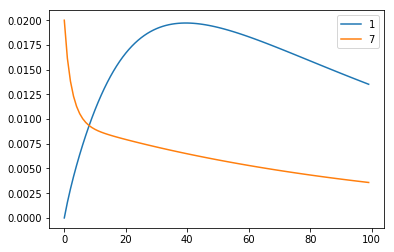

In [109]:
G = nx.erdos_renyi_graph(20, 0.2)
SIR = SIR_det_k(G, T = 100, beta = 0.3, mu = 0.01)
for k in [min(SIR[3]), max(SIR[3])]:
    plt.plot(range(100), SIR[1][k], label = k)
    plt.legend()

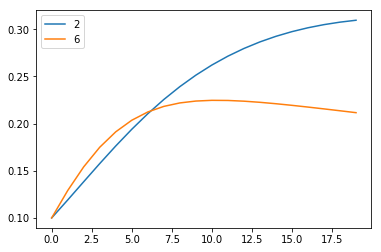

In [112]:
G = nx.barabasi_albert_graph(20, 2)
SIR = SIR_det_k(G, T = 20, beta = 0.3, mu = 0.01)
for k in [min(SIR[3]), max(SIR[3])]:
    plt.plot(range(20), SIR[1][k], label = k)
    plt.legend()

No handles with labels found to put in legend.


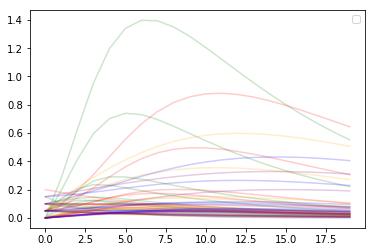

In [107]:
colors = ['', 'green', 'red', 'orange', 'blue', 'purple']
G = nx.barabasi_albert_graph(100, 2)
for b in range(1,6):
    beta = .2/b
    SIR = SIR_det_k(G, T = 20, beta = beta, mu = 0.1)
    color = colors[b]
    for k in SIR[3]:
        plt.plot(range(20), SIR[1][k], color = color, alpha = 0.2)
    #plt.plot(range(20), SIR[2][list(SIR[3])[-1]], color=color, alpha=0.3)

plt.legend()

In [76]:
SIR_det_k(G, T = 20, beta = 0.3, mu = 0.01)

0.18